In [14]:
# -*- coding: utf-8 -*-
"""
This code package is to generate data for the elliptical cylinder permanent magnet
Created on Wed Nov 17 15:10:12 2021

@author: s4612643
"""
import random
import time
from numpy import pi
import pickle
import MagField_2
from tqdm import tqdm

mu0 = 4*pi*10**-7

random.seed(123)
#para = [[R, h, r, \phi, z, J_X, J_Y, J_Z]] 
R_l = []
h_l = []
r_l = []
phi_l = []
z_l = []
J_X_l = []
J_Y_l = []
J_Z_l = []
magnetization = [0, 0, 1]
para = []
output_field = []
    
output_field_axial = []
output_field_azimuthal = []
output_field_radial = []

H_axial_axial_l = []
H_diam_axial_l = []
z0 = -75
phi0 = 0
start_time = time.time()
for i in tqdm(range(int(1000))):
    a = 30
    b = 25
    #R_l.append(R)
    h = 30 # random.uniform(55, 100)
    h_l.append(h)
    r = 75 # random.uniform(155, 200)
    r_l.append(r)
    phi = 20*pi/180
    phi_l.append(phi)
    z = z0 + i*225/1000 # from -75 to 150
    z_l.append(z)
    #random.shuffle(magnetization)
    J_X, J_Y, J_Z = magnetization
    J_X_l.append(J_X)
    J_Y_l.append(J_Y)
    J_Z_l.append(J_Z)
    para.append([z])
    # Computation of axial component
    H_diam_axial = MagField_2.B_ellip_cylinder_diam_axial(J_X, J_Y, a/1000, b/1000, h/1000, r/1000, z/1000, phi)/mu0
    H_diam_axial_l.append(H_diam_axial)
    H_axial_axial = MagField_2.B_ellip_cylinder_axial_axial(J_Z, a/1000, b/1000, h/1000, r/1000, z/1000, phi)/mu0
    H_axial_axial_l.append(H_axial_axial)
    H_axial = H_diam_axial + H_axial_axial
    # Computation of azimuthal component
    H_diam_azimuthal = MagField_2.B_ellip_cylinder_diam_azimuthal(J_X, J_Y, a/1000, b/1000, h/1000, r/1000, z/1000, phi)/mu0
    H_axial_azimuthal = MagField_2.B_ellip_cylinder_axial_azimuthal(J_Z, a/1000, b/1000, h/1000, r/1000, z/1000, phi)/mu0
    H_azimuthal = H_diam_azimuthal + H_axial_azimuthal
    # Computation of radial component
    H_diam_radial = MagField_2.B_ellip_cylinder_diam_radial(J_X, J_Y, a/1000, b/1000, h/1000, r/1000, z/1000, phi)/mu0
    H_axial_radial = MagField_2.B_ellip_cylinder_axial_radial(J_Z, a/1000, b/1000, h/1000, r/1000, z/1000, phi)/mu0
    H_radial = H_diam_radial + H_axial_radial
    
    output_field_axial.append([H_axial])
    output_field_azimuthal.append([H_azimuthal])
    output_field_radial.append([H_radial])
    output_field.append([H_axial, H_azimuthal, H_radial])
    #, H_axial/mu0, H_radial/mu0 
    
with open('para_changing_z_feature', 'wb') as filename:
    pickle.dump(para, filename)
    
with open('output_field_changing_z_feature', 'wb') as filename:
    pickle.dump(output_field, filename)

with open('output_field_az_changing_z_feature', 'wb') as filename:
    pickle.dump(output_field_azimuthal, filename)
        
used_time = time.time() - start_time

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.79it/s]


With all other features keeping constant: 
Changing Z feature with a fix step.


Text(0.5, 0, 'Z')

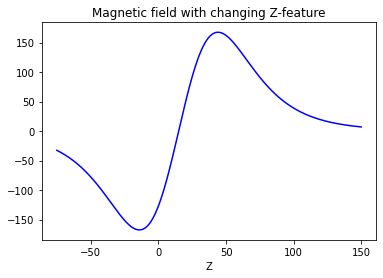

In [15]:
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

with open('para_changing_z_feature', 'rb') as filename:
  z = pickle.load(filename)

with open('output_field_az_changing_z_feature', 'rb') as filename:
  s_y_test_z = pickle.load(filename)


print ('With all other features keeping constant: ')
print ('Changing Z feature with a fix step.')
# for i in range(5):
#     print('With Z value of: ' + str(Z[i]) + ' has M.field of: ' + str(s_y_test_z[i]))

plt.plot(z, s_y_test_z, color = 'blue')
plt.title('Magnetic field with changing Z-feature')
plt.xlabel('Z')


In [16]:
import numpy as np

np.array(z).shape
print(para)

[[-75.0], [-74.775], [-74.55], [-74.325], [-74.1], [-73.875], [-73.65], [-73.425], [-73.2], [-72.975], [-72.75], [-72.525], [-72.3], [-72.075], [-71.85], [-71.625], [-71.4], [-71.175], [-70.95], [-70.725], [-70.5], [-70.275], [-70.05], [-69.825], [-69.6], [-69.375], [-69.15], [-68.925], [-68.7], [-68.475], [-68.25], [-68.025], [-67.8], [-67.575], [-67.35], [-67.125], [-66.9], [-66.675], [-66.45], [-66.225], [-66.0], [-65.775], [-65.55], [-65.325], [-65.1], [-64.875], [-64.65], [-64.425], [-64.2], [-63.975], [-63.75], [-63.525], [-63.3], [-63.075], [-62.85], [-62.625], [-62.4], [-62.175], [-61.95], [-61.725], [-61.5], [-61.275], [-61.05], [-60.825], [-60.6], [-60.375], [-60.15], [-59.925], [-59.7], [-59.475], [-59.25], [-59.025], [-58.8], [-58.575], [-58.35], [-58.125], [-57.9], [-57.675], [-57.45], [-57.225], [-57.0], [-56.775], [-56.55], [-56.325], [-56.1], [-55.875], [-55.65], [-55.425], [-55.2], [-54.975], [-54.75], [-54.525], [-54.3], [-54.075], [-53.85], [-53.625], [-53.4], [-53.1

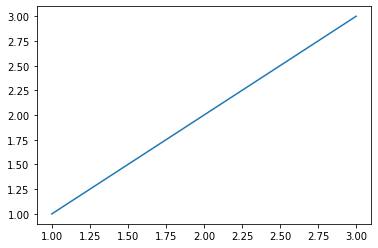

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,3], [1,2,3])